In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #viz 1 
import seaborn as sns #statistics plotting

df = pd.read_csv("C:/Users/akmel/Downloads/Volve field equinor.csv", index_col =0 , parse_dates = True)


In [3]:
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


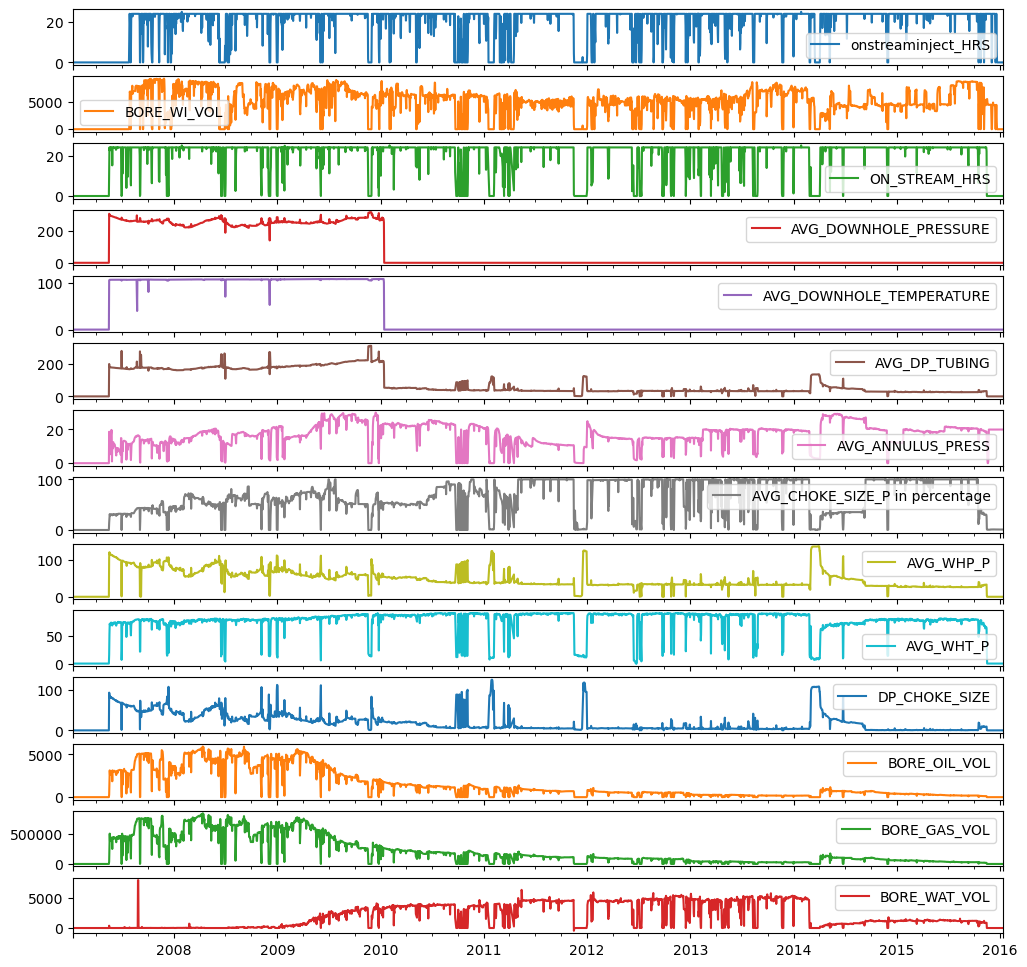

In [5]:
df.plot(subplots=True ,figsize=(12,12));

<Axes: >

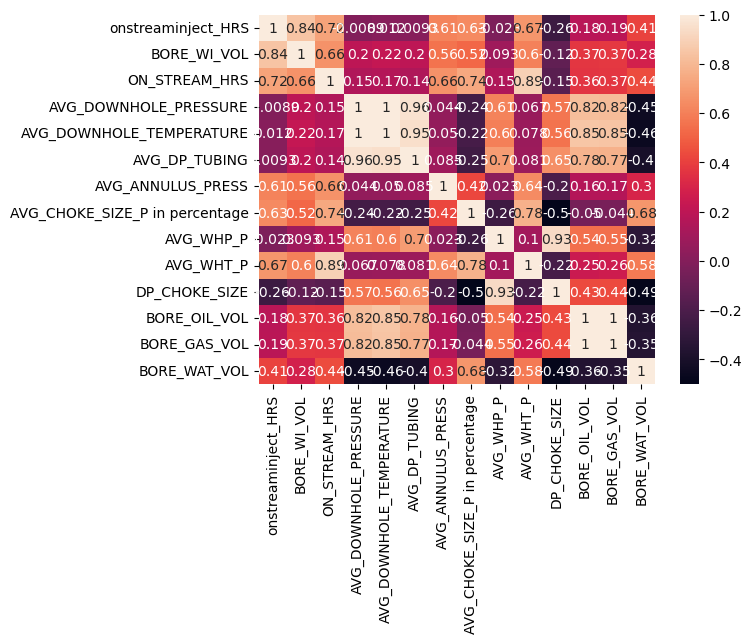

In [7]:

output_col = 'BORE_OIL_VOL'

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)



,Corr
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


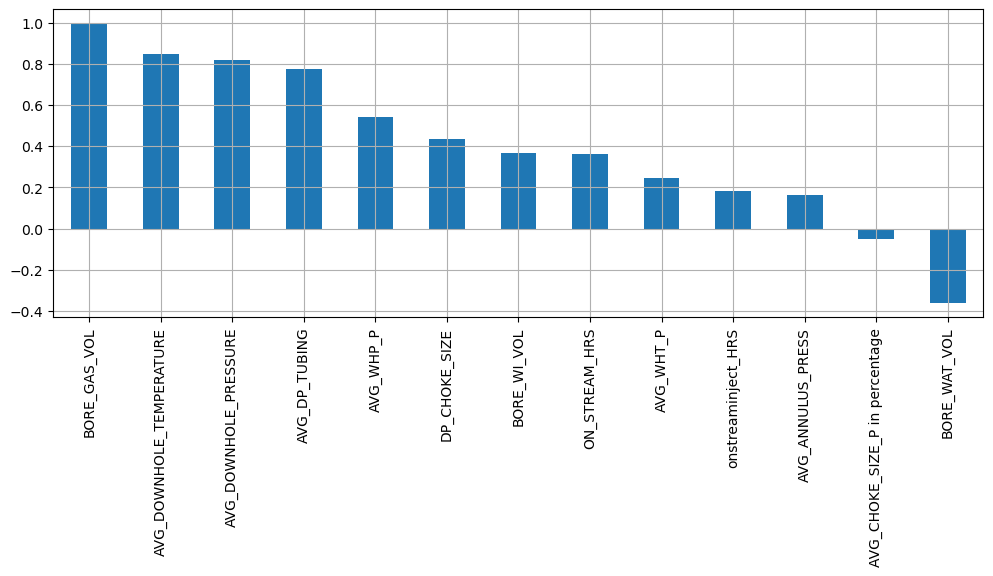

In [9]:

numeric_df = df.select_dtypes(include='number')

#correlations 
numeric_df.corr()[output_col].sort_values(ascending=False)[1:].plot(
    kind='bar', figsize=(12,4), grid=True
)

corr_df = pd.DataFrame(
    numeric_df.corr()[output_col].sort_values(ascending=False)[1:]
)
corr_df.columns = ['Corr']

corr_df


In [11]:
input_columns = corr_df[(abs(corr_df['Corr'])>0.2) & (corr_df[ 'Corr']<0.90)]. index

In [13]:
input_columns 

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

In [15]:

x = df[input_columns] ; y = df[output_col]
x.shape , y.shape



((3291, 9), (3291,))

In [35]:
train_length = 3000 #days
x_train, y_train = x.iloc[: train_length, :] , y[:train_length]

x_test, y_test = x.iloc[train_length:, :] , y[train_length: ]

x_train.shape, x_test. shape

((3000, 9), (291, 9))

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxscaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

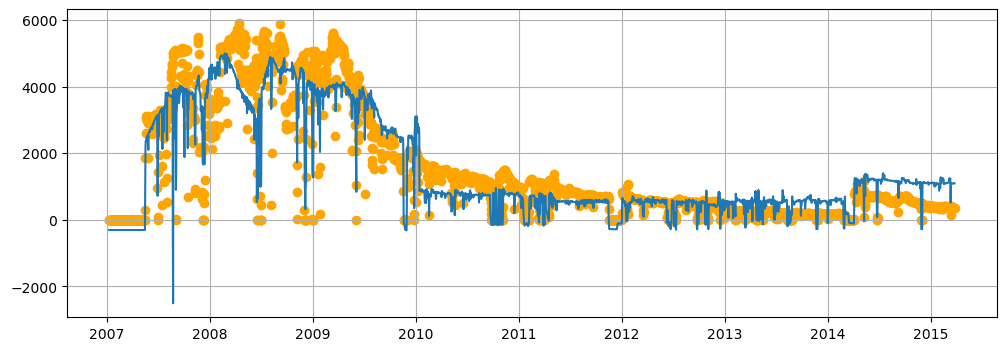

In [39]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train_scaled, y_train)

yp_train = lm.predict(x_train_scaled)

plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length], y_train, color='orange')

plt.plot(df.index[:train_length], yp_train)

plt.grid()


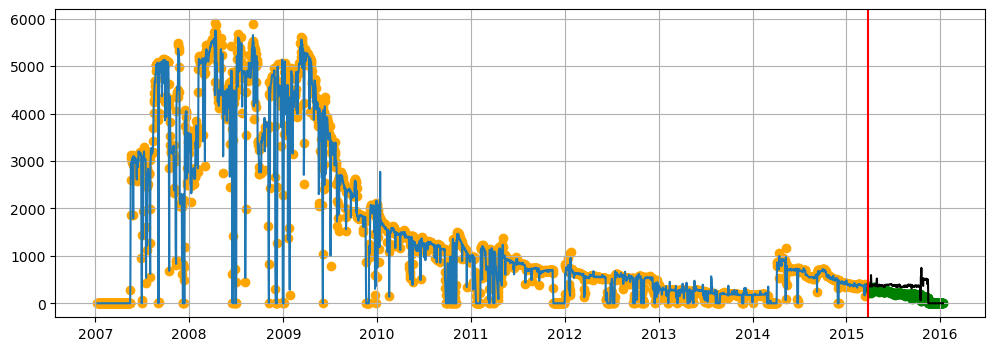

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

yp_train = rf.predict(x_train)
yp_test = rf.predict(x_test)

plt.figure(figsize=(12,4))

plt.scatter(df.index[:train_length], y_train, color='orange')
plt.plot(df.index[:train_length], yp_train)

plt.scatter(df.index[train_length:], y_test, color='green')
plt.plot(df.index[train_length:], yp_test, color='black')

plt.axvline(df.index[train_length], color='red')
plt.grid()
